# Handwritten Digits Recognition SVM Assignment

##### Problem Statement: 
A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

#### Business Goal:- 

We are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Let us first import NumPy and Pandas and read the housing dataset
# Importing all required packages
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Reading the given data set train.csv into a data frame digits_df . The data set train.csv should be
# placed in the same folder as the ipynb file
digits_df = pd.read_csv('Data Set/train.csv')
digits_df.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [3]:
#Inspecting the dataset
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
#Inspecting the dataset
digits_df.shape

(42000, 785)

In [5]:
# Let us look at the various digit classes in the data set
order = list(np.sort(digits_df['label'].unique()))
order = [str(i) for i in order]
print(order)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Text(0.5,1,'Given Data: 9')

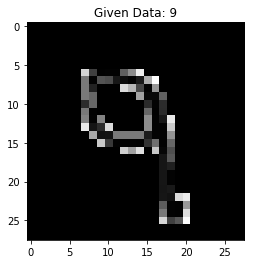

Text(0.5,1,'Given Data: 7')

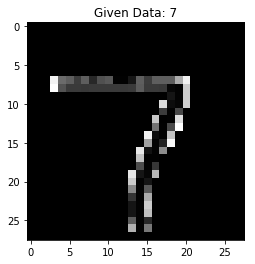

Text(0.5,1,'Given Data: 4')

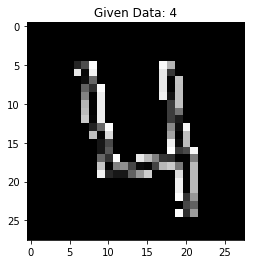

Text(0.5,1,'Given Data: 3')

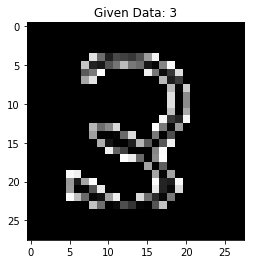

Text(0.5,1,'Given Data: 6')

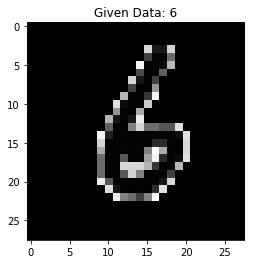

Text(0.5,1,'Given Data: 2')

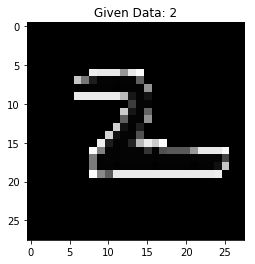

Text(0.5,1,'Given Data: 3')

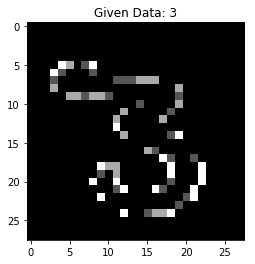

Text(0.5,1,'Given Data: 6')

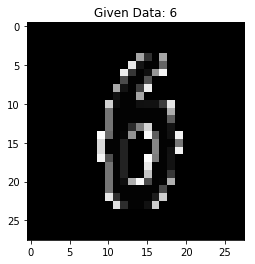

Text(0.5,1,'Given Data: 2')

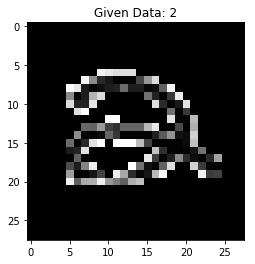

Text(0.5,1,'Given Data: 6')

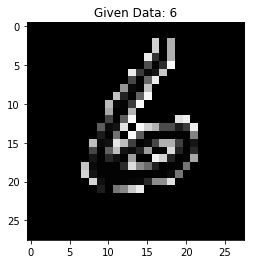

Text(0.5,1,'Given Data: 4')

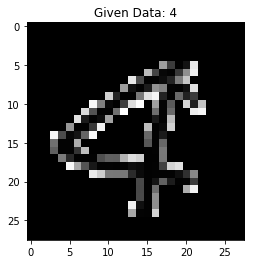

Text(0.5,1,'Given Data: 0')

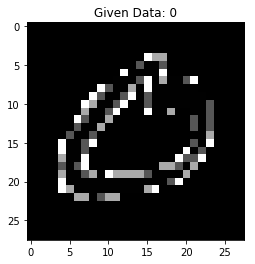

Text(0.5,1,'Given Data: 9')

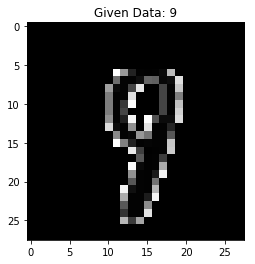

Text(0.5,1,'Given Data: 7')

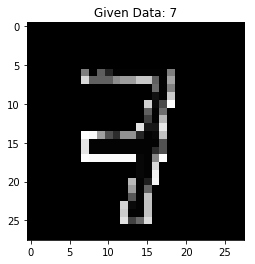

Text(0.5,1,'Given Data: 2')

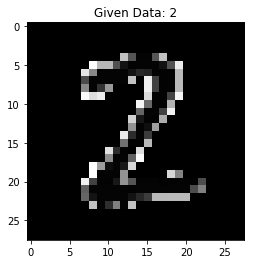

Text(0.5,1,'Given Data: 8')

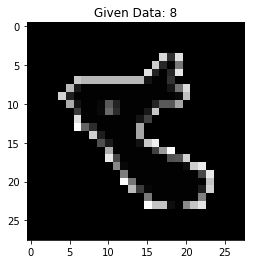

Text(0.5,1,'Given Data: 3')

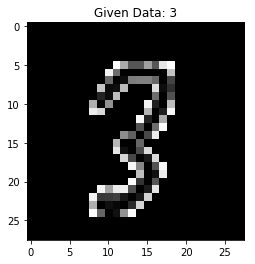

Text(0.5,1,'Given Data: 4')

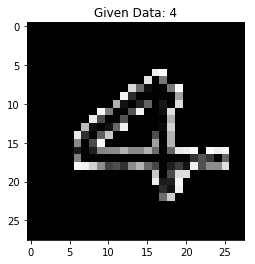

Text(0.5,1,'Given Data: 5')

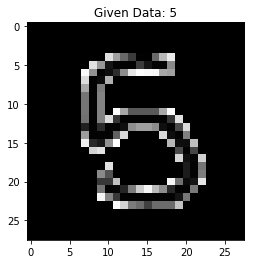

Text(0.5,1,'Given Data: 0')

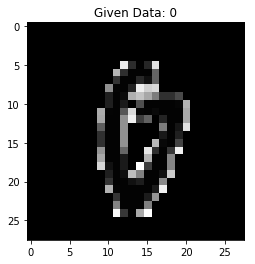

In [6]:
# Let us have a look how these digits actually appear
for i in (np.random.randint(0,270,20)):
    two_d = (np.reshape(digits_df.drop('label', axis=1).values[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Given Data: {0}'. format(digits_df['label'][i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

In [7]:
# Analysing data
# Checking columns
print("\nThe various columns are:-\n")
print(list(digits_df.columns))

print("\n No. of columns :-",digits_df.shape[1])


The various columns are:-

['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pix

In [8]:
# Let's look at value count of each digit 
class_metrics = digits_df['label'].value_counts().reset_index()
class_metrics.columns =['digit','counts']
class_metrics

,digit,counts
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


## Step 2: Data Analysis and Cleaning

#### Missing Values Analysis

In [9]:
# Checking the percentage of missing values
round(100*(digits_df.isnull().sum()/len(digits_df.index)), 2)

label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dtype: floa

In [10]:
# Since there are a lot of rows with 0% and not all of the rows are properly visible
# Let's concentrate on the rows with greater than 0 % nulls

# Derive a list of all the raw attributes that contain atleast one missing values
attrib_with_null = [attrib  for attrib in digits_df.columns if digits_df[attrib].isnull().sum()>0]

# Total attributes with null values 
print ('Total attributes with null values:- ',len(attrib_with_null))

# Let's print the attribute name and percentage missing values
for attrib in attrib_with_null:
    print(attrib, 100 * np.round(digits_df[attrib].isnull().mean(), 3),'%')

Total attributes with null values:-  0


#### Derivation of New variables

In [11]:
# We already have a good amunt of variables that should be sufficient for explanation 
# and we dont need any new derived varaibles

#### Treatment of outliers 

In [12]:
# Analysing Outliers
digits_df.describe(percentiles=[0.05,0.1,0.2,0.25,0.35,0.5,0.6,0.75,0.9,0.99])

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
5%         0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
10%        1.000000      0.0      0.0      0.0      0.0      0.0      0.0   
20%        1.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
35%        3.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
60%        5.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
90%        8.000000      0.0      0.0      0.0      0.0      0.0      0.0   
99%        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8   pixel9  pixel10  pixel11      pixel12  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.00000   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.00300   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.56812   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
5%         0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
10%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
20%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
35%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
60%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
90%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
99%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
max        0.0      0.0      0.0      0.0      0.0      0.0    116.00000   

            pixel13       pixel14       pixel15  pixel16  pixel17  pixel18  \
count  42000.000000  42000.000000  42000.000000  42000.0  42000.0  42000.0   
mean       0.011190      0.005143      0.000214      0.0      0.0      0.0   
std        1.626927      1.053972      0.043916      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
5%         0.000000      0.000000      0.000000      0.0      0.0      0.0   
10%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
20%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
35%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
60%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
90%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
99%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max      254.000000    216.000000      9.000000      0.0      0.0      0.0   

       pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0    

In [13]:
# Although we notice that we have outliers in columns but taking into consideration the business 
# sense we are ok with having outliers

## Step 3: Data Visualisation

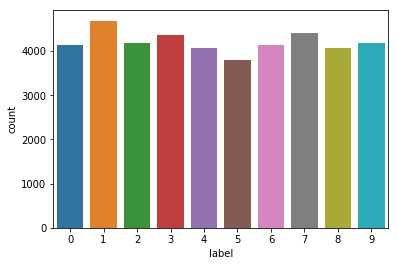

In [14]:
# We could see a countplot of each letter in train
sns.countplot(digits_df['label'])

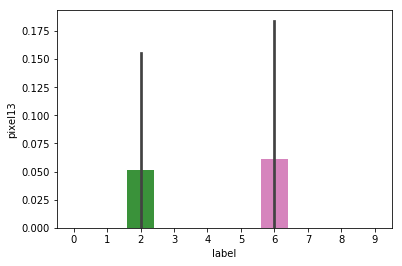

In [15]:
# basic plots: How do various attributes vary with the diigts
# Plotting some arbitrary pixles against lables
sns.barplot(x='label', y='pixel13', 
            data=digits_df, 
            )

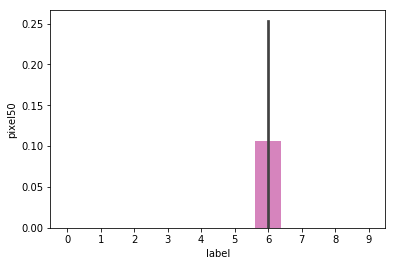

In [16]:

sns.barplot(x='label', y='pixel50', 
            data=digits_df)

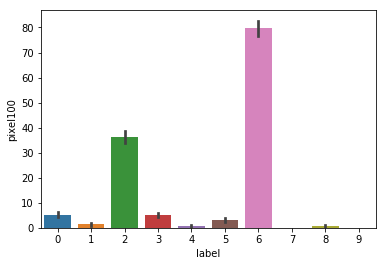

In [17]:

sns.barplot(x='label', y='pixel100', 
            data=digits_df)

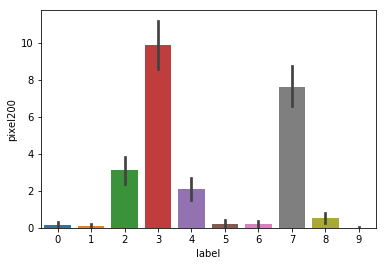

In [18]:

sns.barplot(x='label', y='pixel200', 
            data=digits_df)

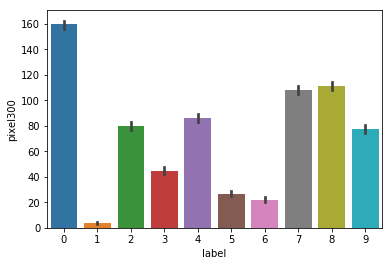

In [19]:

sns.barplot(x='label', y='pixel300', 
            data=digits_df)

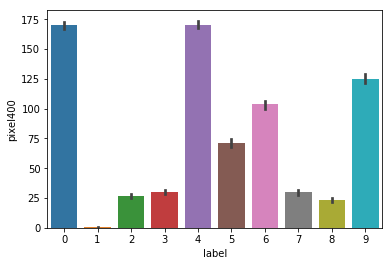

In [20]:

sns.barplot(x='label', y='pixel400', 
            data=digits_df)

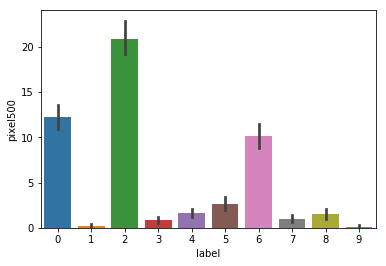

In [21]:

sns.barplot(x='label', y='pixel500', 
            data=digits_df)

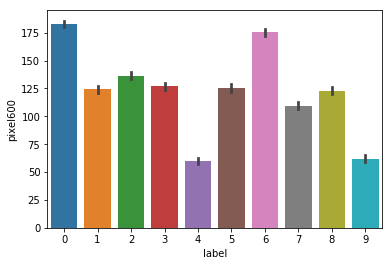

In [22]:

sns.barplot(x='label', y='pixel600', 
            data=digits_df)

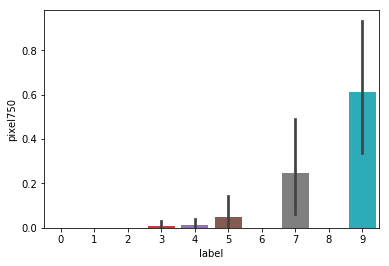

In [23]:

sns.barplot(x='label', y='pixel750', 
            data=digits_df)

<Figure size 3600x720 with 0 Axes>

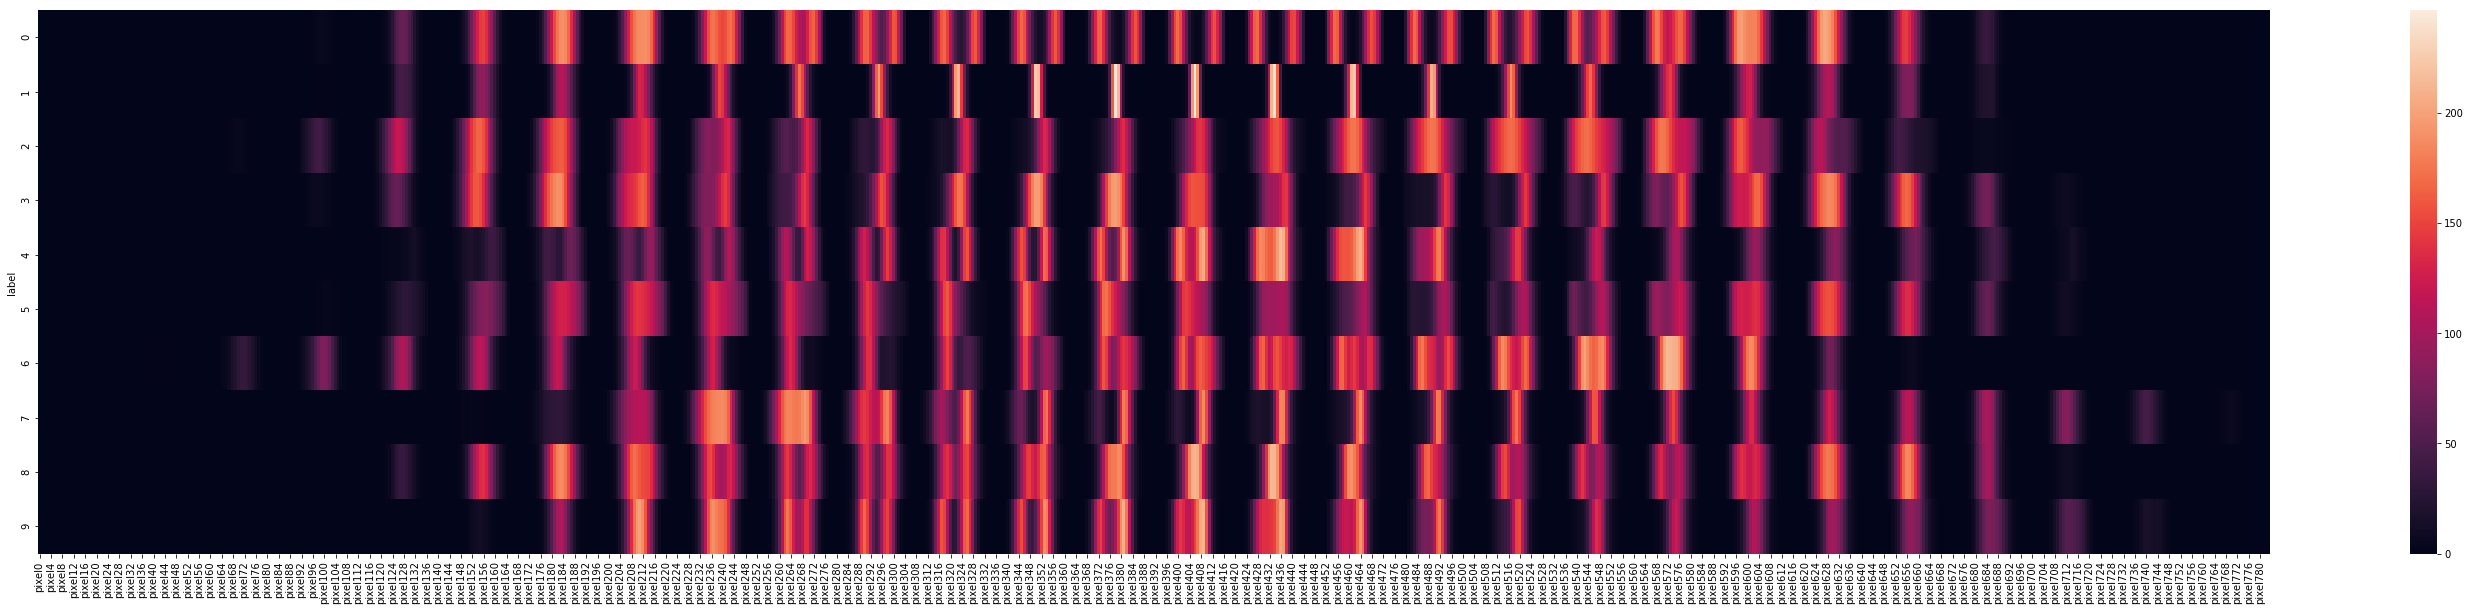

In [24]:
digit_means = digits_df.groupby('label').mean()
plt.figure(figsize=(50, 10))
sns.heatmap(digit_means)

## Step 4 : Data Preparation and Feature Engineering incluidng Test Train Split

Let's conduct some data preparation steps before modeling. 

In [25]:
# Checking for class imbalance in original data
class_rep =  digits_df['label']
class_rep = class_rep.value_counts()
size =  digits_df['label'].size
class_rep = class_rep.apply(lambda x: (x / size) *100)
print(class_rep)


1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64



Also, let's see if it is important to **rescale** the features, since they may have varying ranges.
For example, here are the average values:

In [26]:
# average feature values
round(digits_df.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

In [27]:
# splitting into X and y
x = digits_df.drop("label", axis = 1)
y = digits_df['label']


In [28]:

# train test split
# We need only 20% records for training model so test_size =0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 101)

# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)




StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
# Checking for claas imbalance after the test train split
class_rep =  y_train
class_rep = y_train.value_counts()
size =  y_train.size
class_rep = class_rep.apply(lambda x: (x / size) *100)
print(class_rep)



1    11.000000
7    10.678571
3    10.428571
6    10.238095
0    10.083333
2     9.928571
9     9.916667
8     9.416667
4     9.309524
5     9.000000
Name: label, dtype: float64


This is a balanced data set with similar representation as initial set.. The representation of each class 
 is good. so its a good split.

## Step 5 : Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [30]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# confusion matrix and accuracy for extra_test

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9132440476190476 

[[3186    0   11    4   11   23   31    3   14    2]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  35   29 3028   52   55    9   34   41   48   12]
 [  15   12  105 3046    7  185    5   22   54   24]
 [   8   14   32    2 3059    4   26   31    6  108]
 [  28   23   29  133   41 2628   44   12   73   28]
 [  27    9   44    4   27   31 3116    0   19    0]
 [   6   24   38   19   55   10    3 3214    4  131]
 [  13   49   49  117   19  110   31   17 2843   24]
 [  20   17   20   24  172   20    4  164   26 2888]]


The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [32]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)

# predict
y_pred = non_linear_model.predict(x_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9393154761904762 

[[3200    0   10    4    4    8   33   11   14    1]
 [   0 3687   15   12    9    3    7   15    8    4]
 [  14   13 3105   30   32    6   17   78   42    6]
 [   6    8   64 3190    5   73    6   61   42   20]
 [   3    7   38    1 3098   10   20   36    8   69]
 [  15   10   10   66   16 2772   51   48   33   18]
 [  20    6   10    1   10   31 3150   37   12    0]
 [   6   21   31   10   25    4    0 3320    4   83]
 [  14   24   20   65   15   63   21   42 2990   18]
 [  11   10   12   40   79    6    0  123   25 3049]]


The non-linear model gives approx. 94% accuracy. Thus, going forward, let's choose non linear model as choice and  hyperparameters corresponding to non-linear models.

### Step 6 Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(n_jobs=-1,estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above show some useful insights:
- The data is marginally Non Linear. A high Gamma is leading to lower accuracy
- At any value of Gamma, as the value of C increase, initially it leads to better performance then becomes constant
- The models with higher C tend to overfit. 

This suggests that the problem and the data is **inherently partially non-linear** in nature, and a slightly complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

### Step 7:- Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


In [ ]:
# Let us have a look how these digits actually appear vs predicted values
x_test_inv = scaler.inverse_transform(x_test)
for i in (np.random.randint(0,270,20)):
    two_d = (np.reshape(x_test_inv[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Given Data: {0}'. format(y_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

In [ ]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

class_names = order 

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')



plt.show()

In [ ]:
cmMatrix = confusion_matrix(y_test,y_pred)
#Now the normalize the diagonal entries
values = cmMatrix.diagonal()/cmMatrix.sum(axis=1)

#The diagonal entries are the accuracies of each class
print("The individual accuracies of various classes are :- \n")
print(100* values)


We can observe that the accuracies are conssistently above 91% so the results are not skewed 

In [ ]:
print(classification_report(y_test.values, y_pred, target_names=order))

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

The accuracy of final model is 94.7 % 

## Conclusion

The accuracy achieved using a non-linear kernel (~0.95) is higher than that of a linear one (~0.91). 
We can conclude that the problem is slightly non-linear in nature.